# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from numpy.linalg import inv
from numpy.linalg import norm

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

$\displaystyle\widehat{\theta} = (X^{T}X)^{-1}X^{T}Y \Rightarrow \widehat{\theta} = \left(\sum\limits_{i=1}^n x_i^2\right)^{-1}X^{T}Y = \frac{1}{\sum\limits_{i=1}^n x_i^2}\sum\limits_{i=1}^n x_i Y_i = \frac{1}{\sum\limits_{i=1}^n x_i^2}\sum\limits_{i=1}^n x_i (\theta x_i + \varepsilon_i)$

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

$\displaystyle GD: \theta_{t+1} = \theta_{t} - \eta X^{T}(X\theta_{t}-Y) = \theta_{t} - \eta \sum\limits_{i=1}^n x_{i}(x_{i}^{T} \theta_{t} - Y_{i}) = \theta_{t} - \eta \sum\limits_{i=1}^n x_{i}(x_{i}^{T} \theta_{t} - \theta_{i}x_{i} - \varepsilon_{i}) = \theta_{t} - \eta \theta_{t} \sum_{i=1}^n x_i^2 + \eta \sum_{i=1}^n x_i(\theta_{i}x_{i} + \varepsilon_{i}) = \theta_t \left (1 - \eta\sum_{i=1}^n x_i^2 \right ) + \eta \sum_{i=1}^n x_i(\theta_{i}x_{i} + \varepsilon_{i})$

$\displaystyle SGD: \theta_{t+1} = \theta_{t} - \eta \frac{n}{k}\sum\limits_{j=1}^{k} x_{i_{j}}(x_{i_{j}}^{T}\theta_{t}-Y_{i_{j}}), где \ i_{1},..., i_{k} \sim U\{1,...,n\} \Rightarrow \theta_{t+1} = \theta_{t} - \eta \frac{n}{k} X_{I}^{T}(X_{I}\theta_{t}-Y_{I}),$ где $X_{I}$ - матрица, состоящая из строк матрицы $X$ с номерами $i_{1},..., i_{k}$. $Y_{I}$ - аналогично.

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

$\displaystyle\mathsf{E}\widehat{\theta} = \frac{1}{\sum\limits_{i=1}^n x_i^2}\mathsf{E}\left(\sum\limits_{i=1}^n x_i (\theta x_i + \varepsilon_i)\right) = \frac{1}{\sum\limits_{i=1}^n x_i^2}\sum\limits_{i=1}^n\mathsf{E}(x_i(\theta x_i + \varepsilon_i))$ 

Так как X и Y независимы, то $\displaystyle\frac{1}{\sum\limits_{i=1}^n x_i^2}\sum\limits_{i=1}^n\mathsf{E}(x_i(\theta x_i + \varepsilon_i)) = \frac{1}{\sum\limits_{i=1}^n x_i^2}\sum\limits_{i=1}^n\mathsf{E}x_i\mathsf{E}(\theta x_i + \varepsilon_i)) = \frac{1}{\sum\limits_{i=1}^n x_i^2}\sum\limits_{i=1}^n\mathsf{E}x_i(\theta\mathsf{E}x_i + \mathsf{E}\varepsilon_i)) = \frac{\theta}{\sum\limits_{i=1}^n x_i^2}\sum\limits_{i=1}^n(\mathsf{E}x_i)^2 = \frac{\theta}{\sum\limits_{i=1}^n x_i^2}\sum\limits_{i=1}^nx_i^2 = \theta$ (Воспользовался тем, что $\mathsf{E}\varepsilon_{i} = 0$ и свойствами матожидания).

$\mathsf{E}\widehat{y}(x) = \mathsf{E}(\widehat{\theta} x) = \mathsf{E}\widehat{\theta} \mathsf{E}x = \theta x$ (воспользовался независимостью $\widehat{\theta}$ и x, а также свойствами матожидания).

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$. 

$\displaystyle\mathsf{D}\widehat{\theta} = \mathsf{D}\left(\frac{1}{\sum\limits_{i=1}^n x_i^2}\sum\limits_{i=1}^n x_i (\theta x_i + \varepsilon_i)\right) = \frac{1}{(\sum\limits_{i=1}^n x_i^2)^2}\mathsf{D}\left(\sum\limits_{i=1}^n x_i (\theta x_i + \varepsilon_i)\right) = \frac{1}{(\sum\limits_{i=1}^n x_i^2)^2}\sum\limits_{i=1}^n x_{i}^2 \mathsf{D}(\theta x_i + \varepsilon_i)$

$\displaystyle\mathsf{D}(\theta x_i + \varepsilon_i) = \mathsf{D}(\theta x_i) + \mathsf{D}\varepsilon_i = \mathsf{E}(\theta x_i)^2 - (\mathsf{E}(\theta x_i))^2 + \mathsf{D}\varepsilon_i = \mathsf{D}\varepsilon_i = \sigma^2\Rightarrow\frac{1}{(\sum\limits_{i=1}^n x_i^2)^2}\sum\limits_{i=1}^n x_{i}^2 \mathsf{D}(\theta x_i + \varepsilon_i) = \frac{\sigma^2}{\sum\limits_{i=1}^n x_i^2}$

$\displaystyle\mathsf{D}\widehat{y}(x) = \mathsf{D}(\widehat{\theta} x) = x^2\mathsf{D}\widehat{\theta} = \frac{\sigma^2 x^2}{\sum\limits_{i=1}^n x_i^2}$

**5.** При каких условиях дисперсии в пункте 4 конечны? Подумайте и ответьте на вопрос, как ведет себя дисперсия предсказания в многомерном случае если матрица $X^T X$ близка к вырожденной.

$\displaystyle\mathsf{D}\widehat{\theta}$ и $\displaystyle\mathsf{D}\widehat{y}(x)$ конечны, если $\displaystyle\sum\limits_{i=1}^n x_i^2 = X^{T}X \neq 0$, иначе, матрица $X^{T}X$ - не вырождена.

Если матрица $X^{T}X$ - вырождена, то признаки приближенно линейно зависимы, погрешность нахождения $\theta$ будет зависеть от квадрата числа обусловленности матрицы $X$. Нестрого говоря число обусловленности матрицы 
$X$ - это корень из отношения наибольшего и наименьшего из собственных чисел матрицы $X^{T}X$. Значит полученное выражение для $\theta$ будет численно неустойчивым и дисперсия тоже.

*Замечания.* 
1. В пунктах 3-5 речь идет о $\widehat{\theta}$, которая является *решением* задачи метода наименьших квадратов. Поэтому пользуйтесь явной формулой этого решения, а не формулами методов вычисления решения.
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитай требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

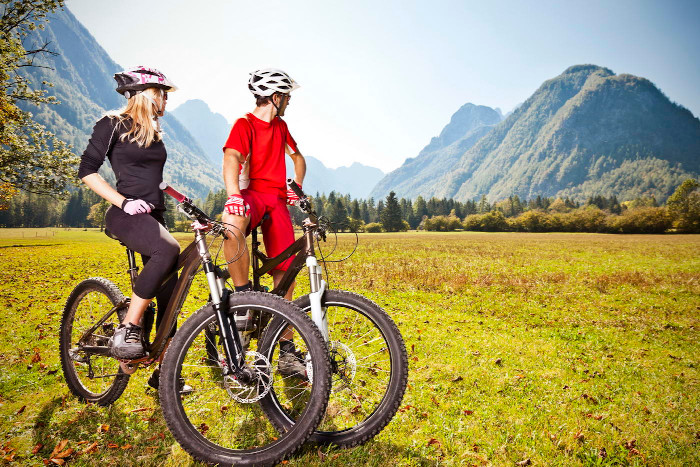

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [4]:
df = pd.read_csv('day.csv', index_col='instant')
df.head()

dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                               
1        2011-01-01       1   0     1        0        6           0   
2        2011-01-02       1   0     1        0        0           0   
3        2011-01-03       1   0     1        0        1           1   
4        2011-01-04       1   0     1        0        2           1   
5        2011-01-05       1   0     1        0        3           1   

         weathersit      temp     atemp       hum  windspeed  casual  \
instant                                                                
1                 2  0.344167  0.363625  0.805833   0.160446     331   
2                 2  0.363478  0.353739  0.696087   0.248539     131   
3                 1  0.196364  0.189405  0.437273   0.248309     120   
4                 1  0.200000  0.212122  0.590435   0.160296     108   
5                 1  0.226957  0.229270  0.436957   0.186900      82   

         registered   cnt  
instant                    
1               654   985  
2               670   801  
3              1229  1349  
4              1454  1562  
5              1518  1600

In [5]:
train, test = train_test_split(df, test_size=0.2)
train.shape, test.shape

((584, 15), (147, 15))

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строит информативные графики.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

In [6]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday'] # категориальные признаки
real_features = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

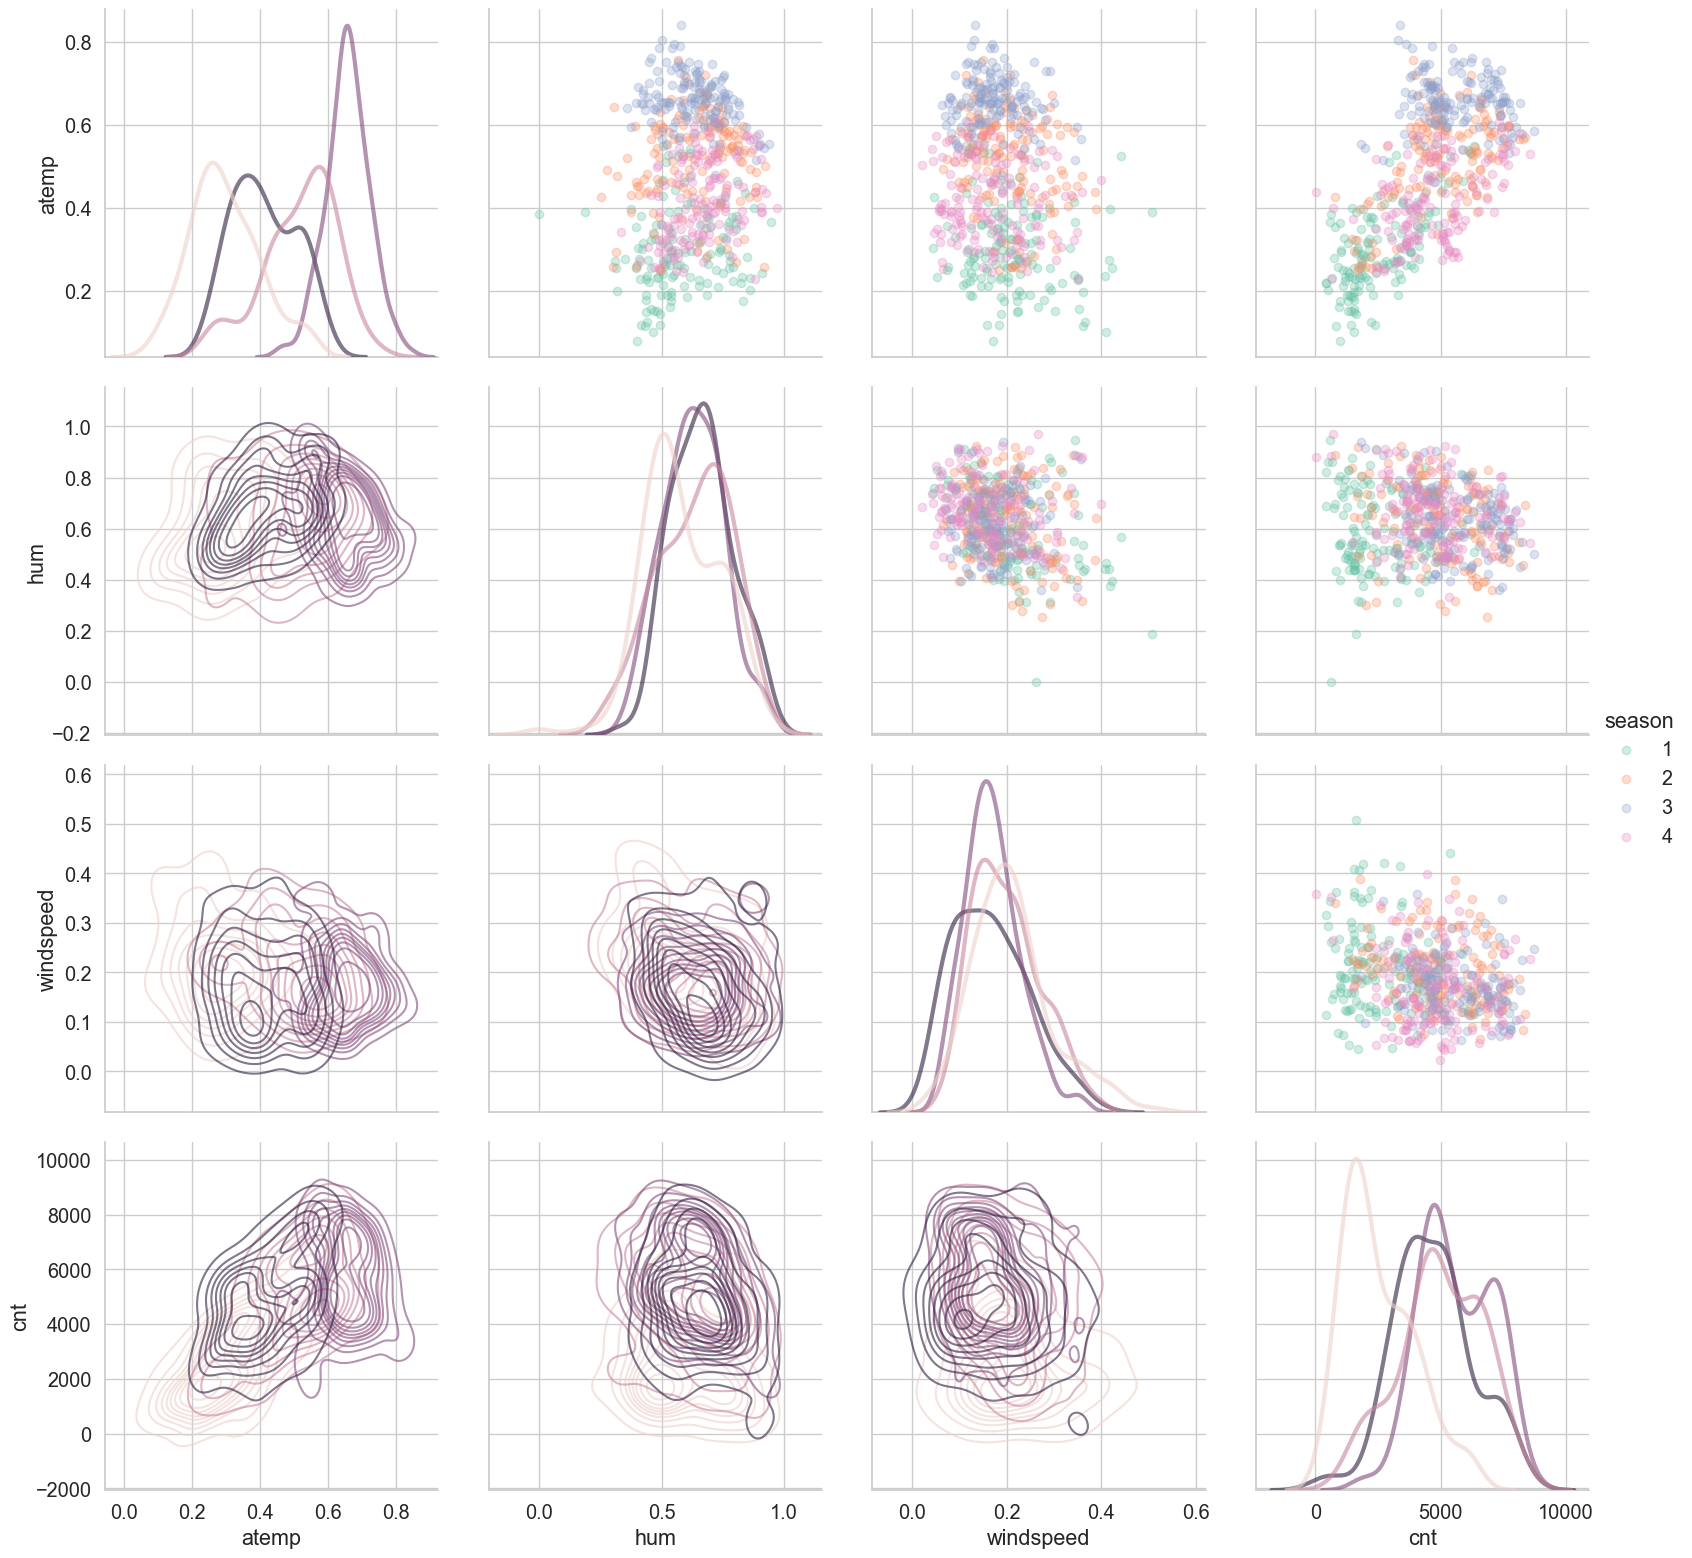

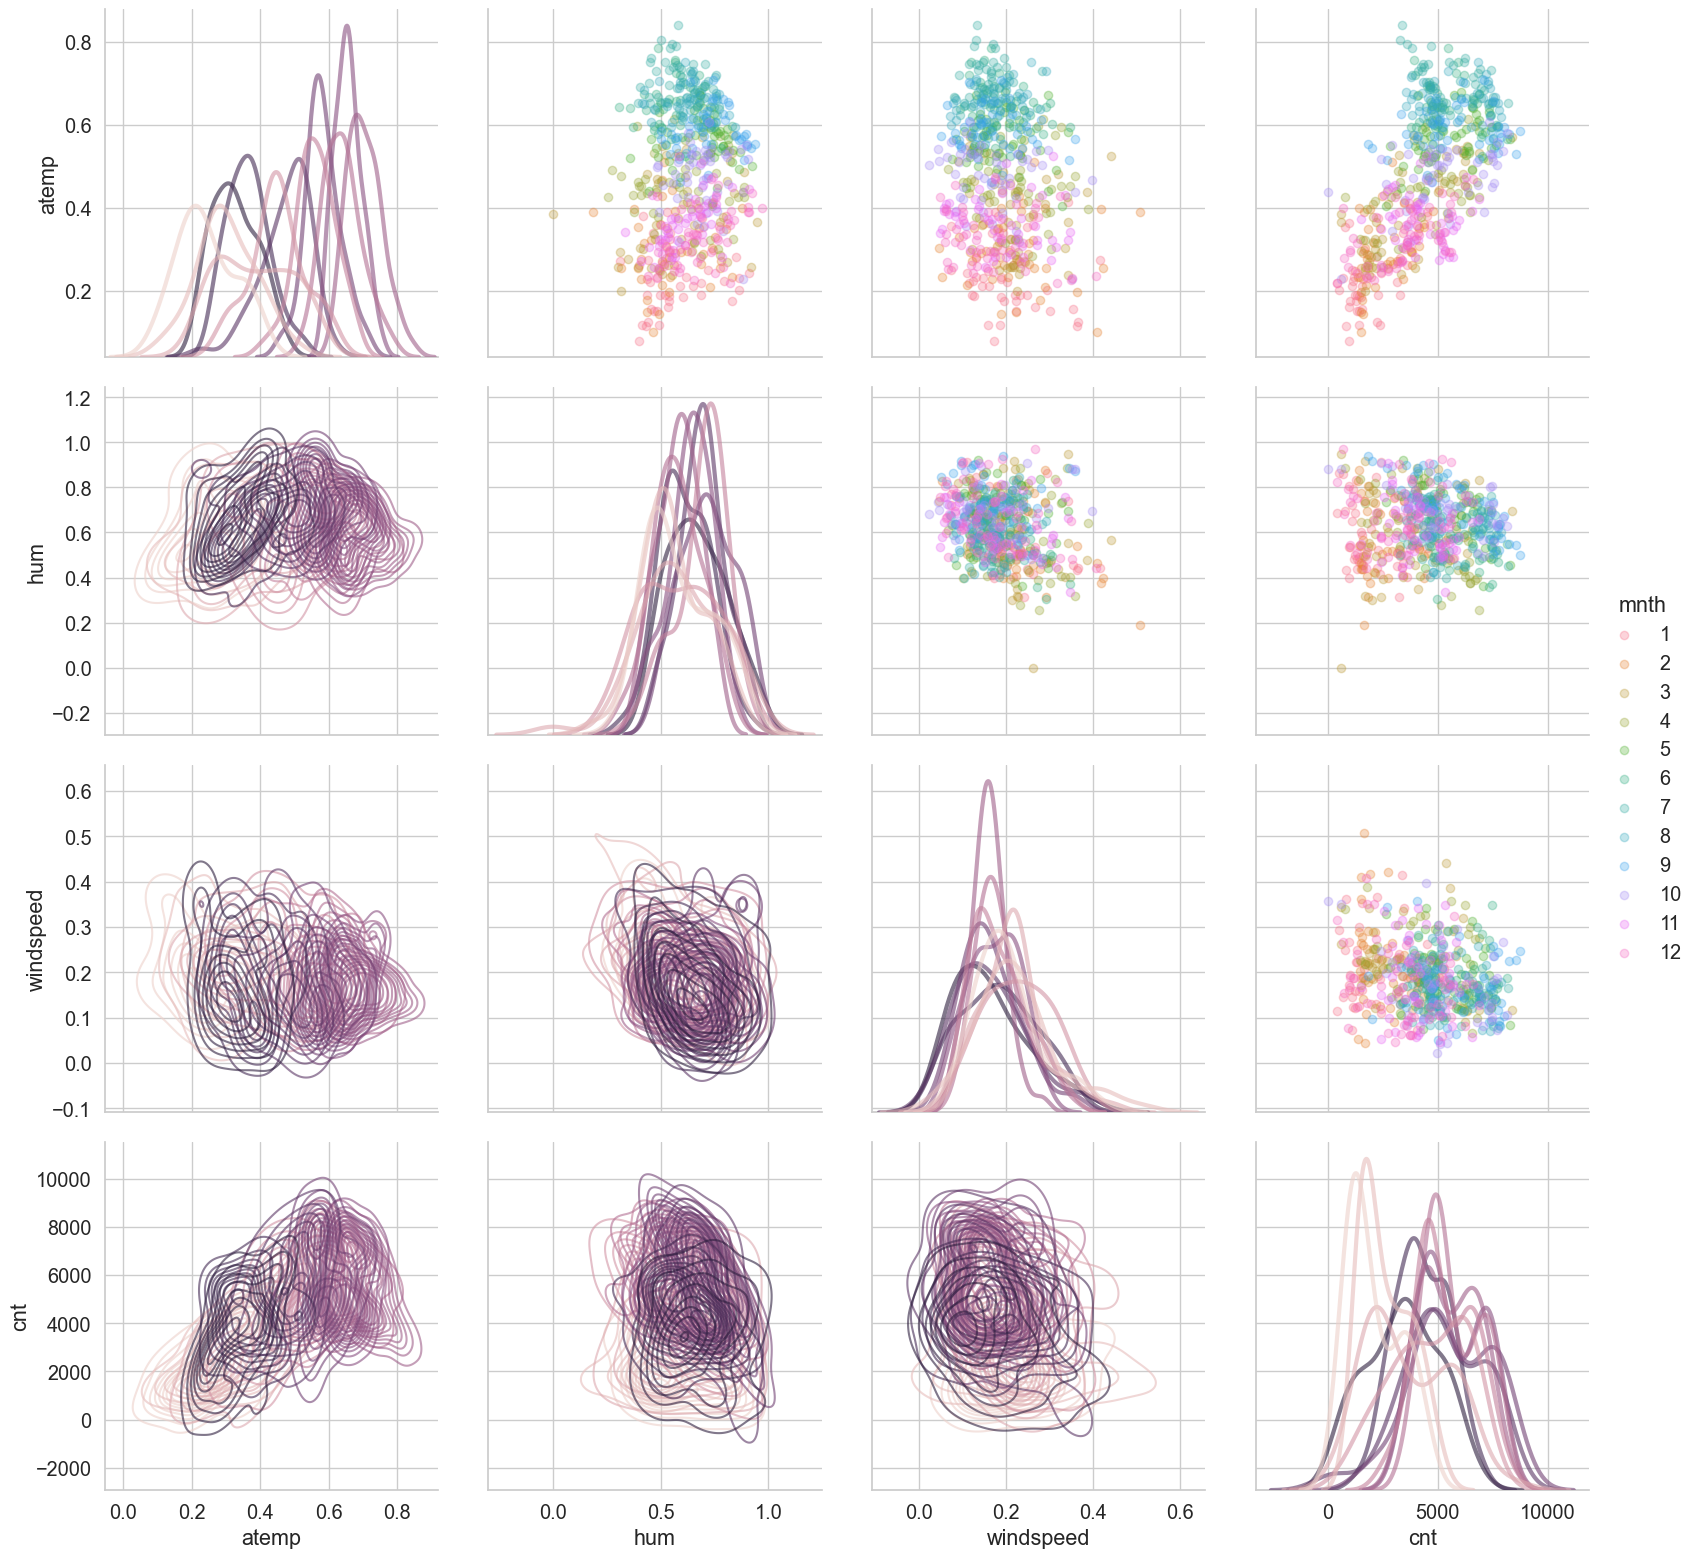

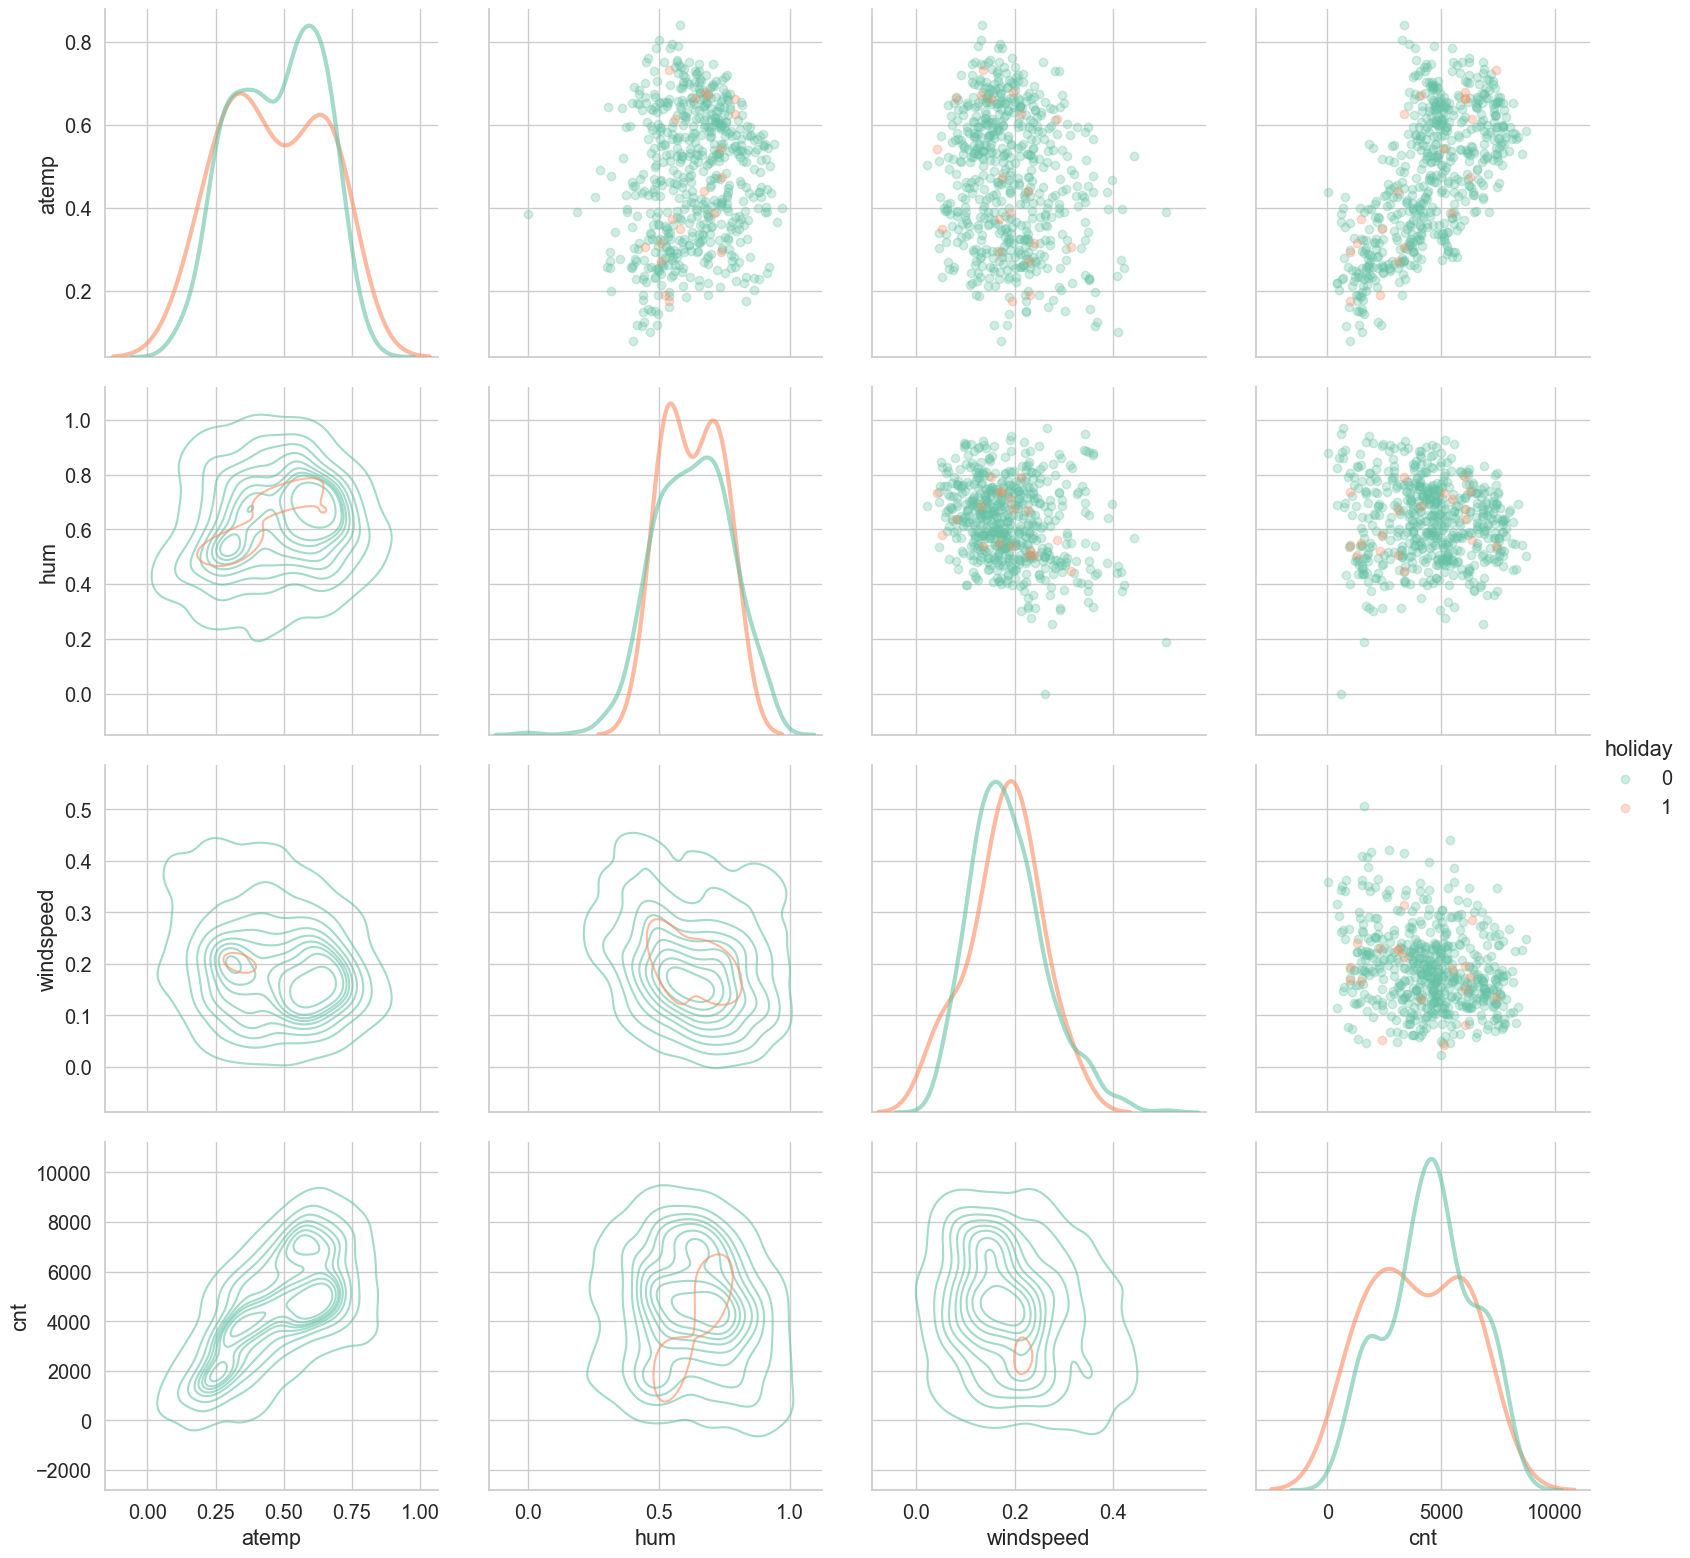

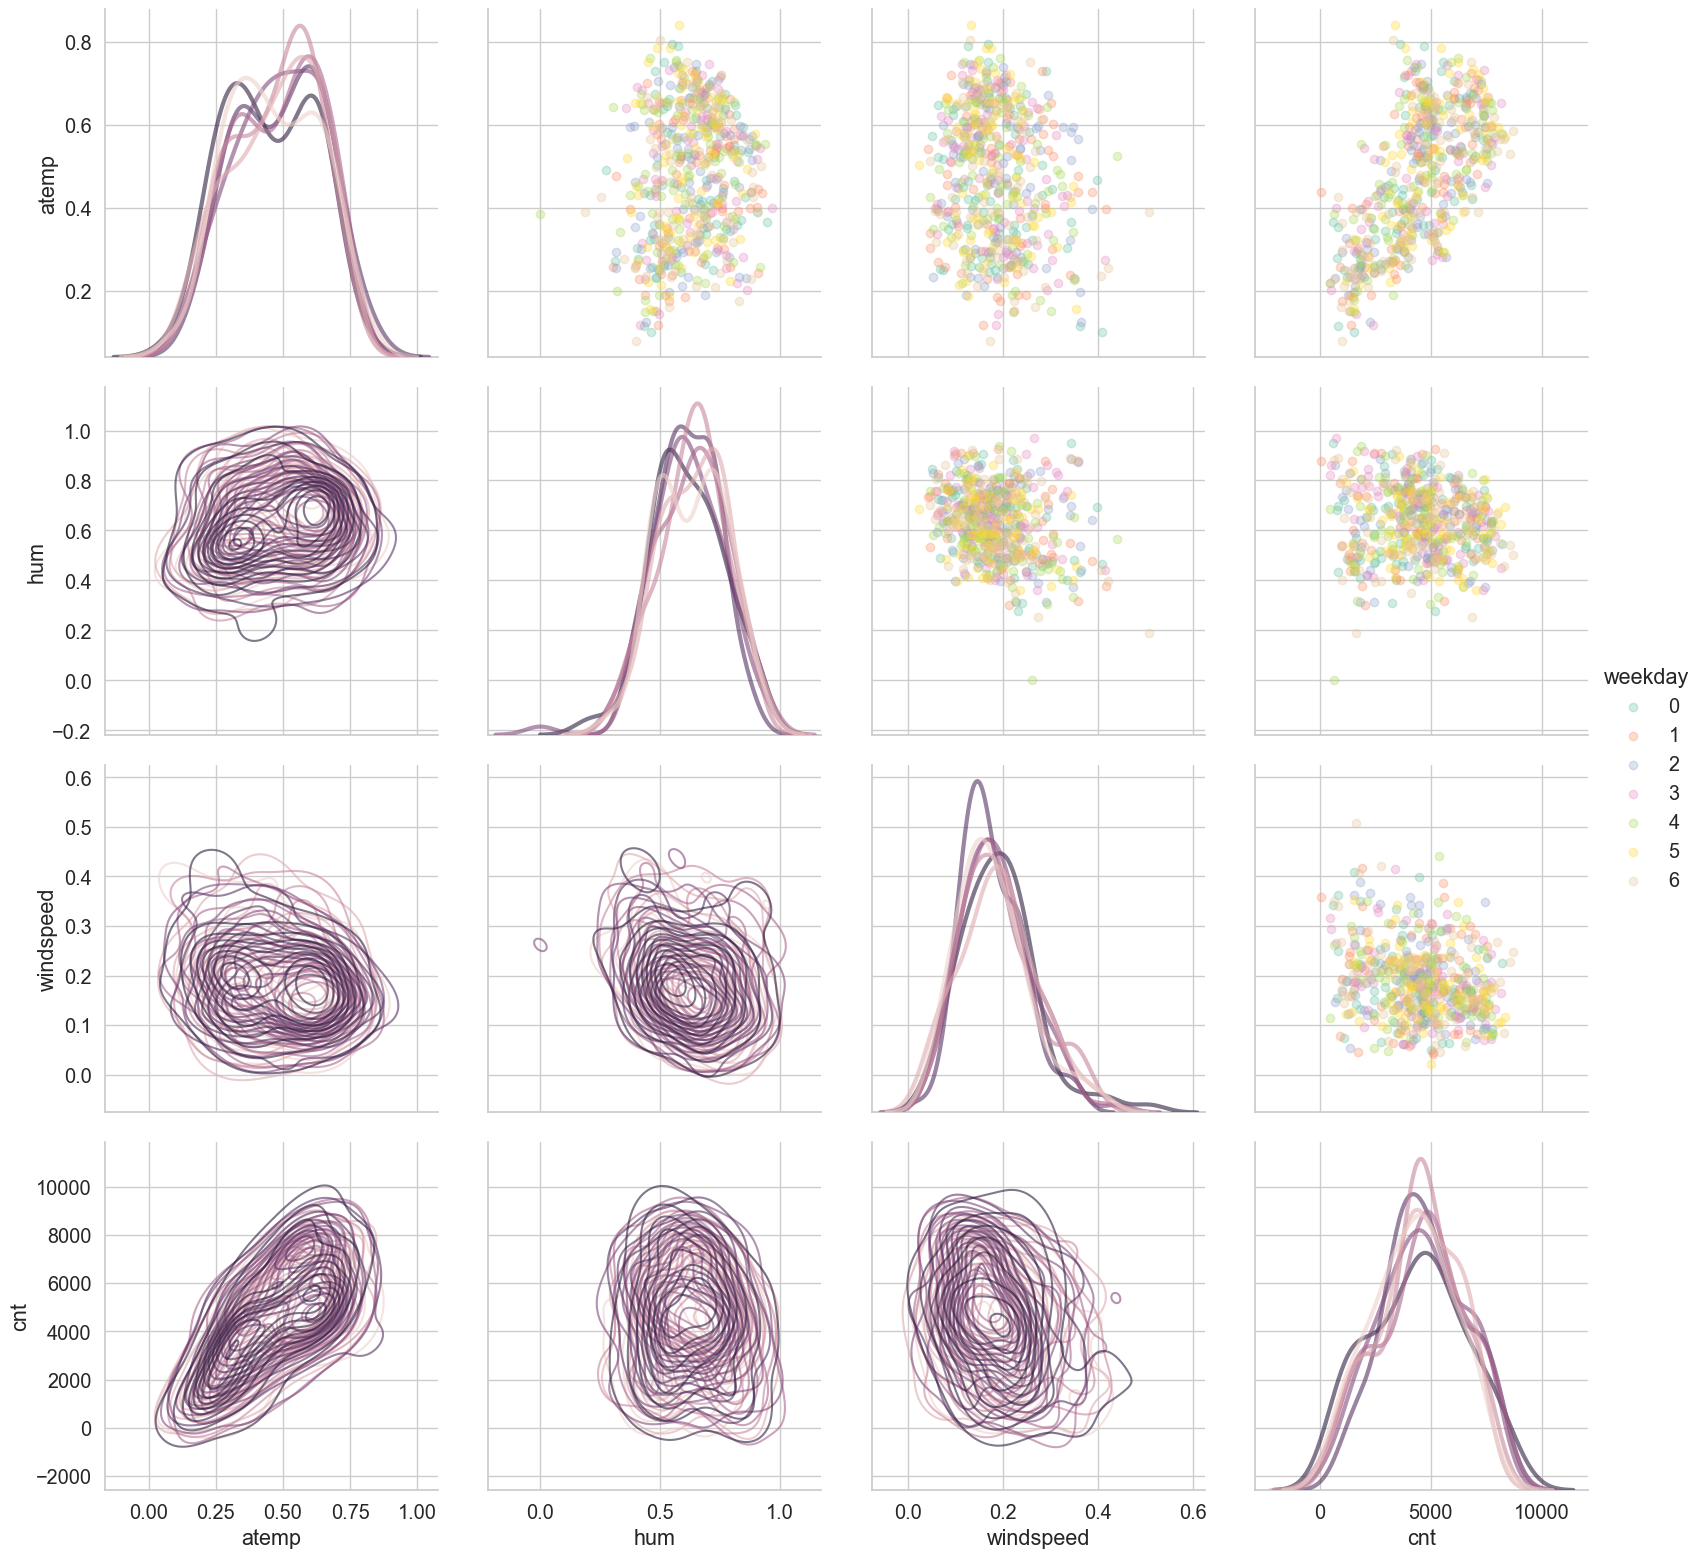

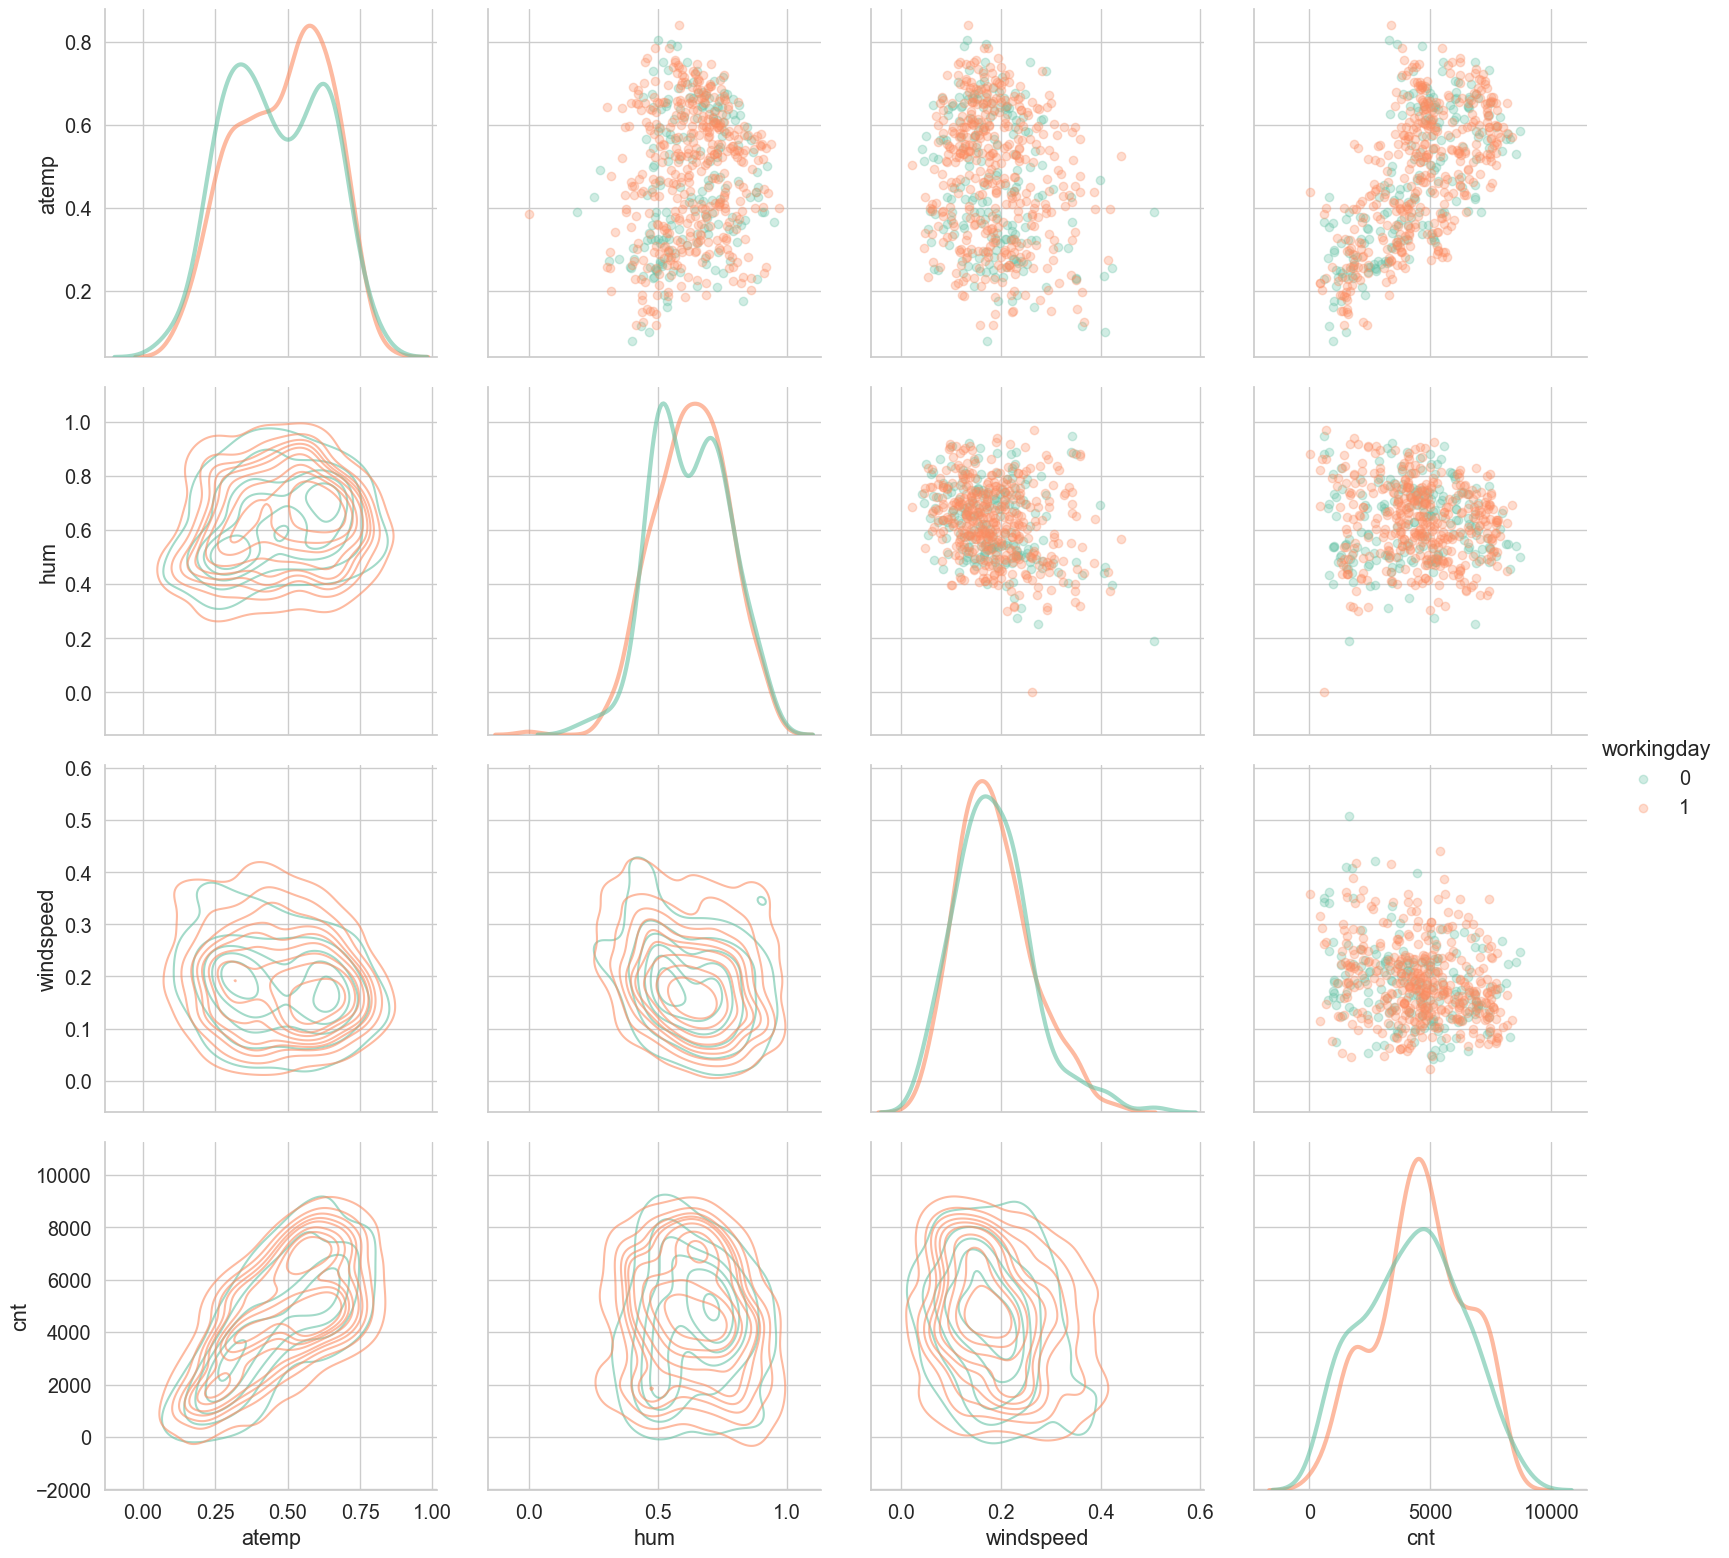

In [7]:
for hue in categorial_features:
    g = sns.PairGrid(train[['atemp', 'hum', 'windspeed', 'cnt', hue]], 
                     hue=hue, diag_sharey=False, height=4)
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании
    
    g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**

1. Чем лучше погода, тем больше арендуют велосипедов.

2. Зимой арендуют велосипеды меньше всего, а в остальные времена года почти одинаково.

4. Есть дни с очень сильным ветром или очень маленькой влажностью, но в целом выбросов нет.

5. Рассматривать какие-либо нелинейные функции от признаков не стоит, потому что на графиках видно, что зависимости либо нет, либо она приблизительно линейная.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**a)** Удалим выбросы: дни, в которых влажность ≤ 0.2 или скорость ветра ≥ 0.5
 
**б)** Закодируем категориальные признаки с помощью one-hot encoding

**в)** Соединим вместе вещественные признаки и закодированные категориальные

Реализуйте данную процедуру.

In [8]:
train = train[(train['hum'] > 0.2) & (train['windspeed'] < 0.5)]

In [9]:
encoder = OneHotEncoder(drop='first', sparse_output=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
train_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [10]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(582, 27)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [11]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_feature])

LinearRegression()

In [12]:
model.coef_, model.intercept_

(array([-2.54148495e+02,  1.46142735e+03,  6.37738076e+03, -3.78354138e+03,
        -3.81483172e+03,  5.65985225e+02,  4.25487434e+02,  1.50701331e+03,
        -1.03148155e+01,  3.01421996e+02,  2.77715191e+02,  3.88126552e+02,
        -3.19452040e+02, -9.65059481e+02, -2.55302111e+02,  5.05016595e+02,
        -1.46082352e+01, -3.15099865e+02, -2.26714484e+02, -1.70579388e+16,
         1.70579388e+16,  1.70579388e+16,  1.70579388e+16,  1.70579388e+16,
         1.70579388e+16,  3.77741932e+02, -1.70579388e+16]),
 3363.3456653251333)

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [13]:
test = test[(test['hum'] > 0.2) & (test['windspeed'] < 0.5)]

test_cat = encoder.transform(test[categorial_features])

X_test = np.hstack([test[real_features], test_cat])

In [14]:
test_preds = model.predict(X_test)

In [15]:
rmse = np.sqrt(((test[target_feature] - test_preds) ** 2).mean())
rmse

1443.614624566614

In [16]:
mae = np.abs(test[target_feature] - test_preds).mean()
mae

1220.7772491406713

In [17]:
mape = 100 * np.abs((test[target_feature] - test_preds) / test[target_feature]).mean()
mape

32.891458839536824

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [18]:
X = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
Y = train[target_feature].to_numpy()

In [19]:
theta = inv(X.T @ X) @ X.T @ Y
theta

array([-4.37705328e+02, -8.11203395e+04,  1.00934318e+05, -9.53514400e+03,
       -5.83641671e+03,  5.65080860e+02,  6.22023007e+02,  1.12366669e+03,
       -1.11159545e+02,  1.28238534e+02, -9.47694790e+01,  4.64261114e+02,
        5.27933109e+01, -8.78650179e+02,  4.66200808e+02,  1.00615572e+03,
       -1.04272755e+00, -5.81855636e+02, -5.17855594e+02, -4.30396539e+03,
        1.27794862e+03, -1.18139700e+03, -7.08343531e+02,  2.21370581e+03,
       -5.50332656e+03,  3.40919727e+02, -2.22080428e+03,  3.41478974e+03])

Проблема в том, что между признаки приближенно линейно зависимы, а значит матрица $X^TX$ - близка к вырожденной. А сама матрица $(X^TX)^{-1}$ имеет очень большие по модулю элементы.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Исправим эту ошибку убрав линейно зависимые признаки.

In [20]:
new_categorial_features = ['mnth', 'weekday', 'workingday'] # категориальные признаки
new_real_features = ['atemp', 'hum', 'windspeed']  # вещественные признаки

In [21]:
new_encoder = OneHotEncoder(drop='first', sparse_output=False)  # объявляем модель
new_train_cat = new_encoder.fit_transform(train[new_categorial_features])  # обучаем и кодируем
new_X = np.hstack([train[new_real_features], new_train_cat, np.ones((train.shape[0], 1))])
new_X.shape

(582, 22)

Посчитаем новую оценку коэффициентов.

In [22]:
new_theta = inv(new_X.T @ new_X) @ new_X.T @ Y
new_theta

array([ 8469.06226662, -4488.5340506 , -4496.52813298,    26.37330625,
         537.64921473,   805.6563829 ,   892.22980011,    90.13376004,
        -680.70939244,    67.08893799,  1121.50324875,  1419.65754905,
        1209.68534194,   792.42749557,  -409.20085954,  -512.876102  ,
        -405.71951105,  -488.85688533,  -468.29007469,   321.20849914,
         750.28580671,  3395.70097747])

Также посчитаем новую ошибку предсказания

In [23]:
new_test_cat = new_encoder.transform(test[new_categorial_features])

new_X_test = np.hstack([test[new_real_features], new_test_cat,np.ones((test.shape[0], 1))])

new_preds = new_X_test @ new_theta

In [24]:
rmse = np.sqrt(((test[target_feature] - new_preds) ** 2).mean())
rmse

1493.5785293526897

In [25]:
mae = np.abs(test[target_feature] - new_preds).mean()
mae

1265.1230530120115

In [26]:
mape = 100 * np.abs((test[target_feature] - new_preds) / test[target_feature]).mean()
mape

34.04467681072006

Сделайте выводы.

**Выводы:**

1. Линейные зависимости между признаками ухудшают оценку коэффициентов по явной формуле, однако убрав лишние линейные зависимости можно получить более хорошую оценку коэффициентов.

2. Не стоит забывать про выбросы, ведь даже пара точек может сильно ухудшить точность и полезность модели.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

$F(\theta) = \| Y - X\theta \|^2 + \lambda \| \theta \|^2 = (Y-X\theta)^T(Y-X\theta) + \lambda \theta^T \theta = Y^TY - 2Y^TX\theta+\theta^T X^T X \theta + \lambda \theta^T \theta$

$\nabla_{\theta} F(\theta) = -2X^{T}Y + 2X^{T}X\theta + 2\lambda\theta = 0 \Rightarrow (X^TX+\lambda)\theta = X^T Y$

Домножим слева на $(X^TX+\lambda)^{-1}$ и получим: $\widehat{\theta} = (X^TX+\lambda)^{-1} X^T Y$

В случае МНК: $\widehat{\theta} = (X^{T}X)^{-1}X^{T}Y$

Данная оценка помогает избавиться от проблемы обратимости матрицы в МНК, так как матрица $(X^TX+\lambda)^{-1}$ будет дальше от необратимой, чем $(X^TX)^{-1}$, даже если между признаками есть линейная зависимость.

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

$\displaystyle GD: \theta_{t+1} = \theta_t - \eta \nabla F(\theta_t) = \theta _t - \eta X^T (X \theta_t - Y) - \eta \lambda \theta_t = (1 - \eta \lambda) \theta _t - \eta X^T (X \theta_t - Y) = (1 - \eta \lambda) \theta_t - \eta \sum\limits_{i=1}^n x_i (x_i^T\theta_t - Y_i)$

$\displaystyle SGD: \theta_{t+1} = (1 - \eta\lambda)\theta_{t} - \eta \frac{n}{k}\sum\limits_{j=1}^{k} x_{i_{j}}(x_{i_{j}}^{T}\theta_{t}-Y_{i_{j}}), где \ i_{1},..., i_{k} \sim U\{1,...,n\} \Rightarrow \theta_{t+1} = (1 - \eta\lambda)\theta_{t} - \eta \frac{n}{k} X_{I}^{T}(X_{I}\theta_{t}-Y_{I}),$ где $X_{I}$ - матрица, состоящая из строк матрицы $X$ с номерами $i_{1},..., i_{k}$. $Y_{I}$ - аналогично.

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

Для всех признаков одна и та же $\lambda$, но признаки изменяются в разных диапазонах: одни признаки могут быть большими по модулю, а другие - маленькими. Но ridge-регрессия пытается одинаково уменьшить все коэффициенты, поэтому их и нужно стандартизировать.

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

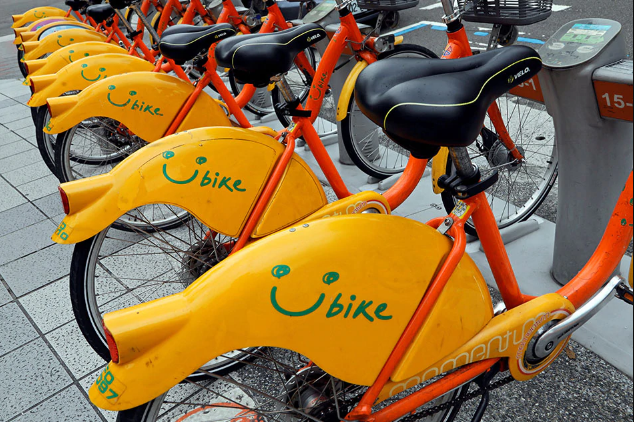

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [102]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True, eta=0.001, stop_threshold=0.000001):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        self.eta = eta
        self.stop_threshold = stop_threshold
        
        
    def fit(self, X_, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        if self.fit_intercept:
            X = np.hstack([X_, np.ones(shape=(X_.shape[0], 1))])
        else:
            X = X_

        self.coef_ = np.zeros((X.shape[1], 1))
        
        while True:
            delta = self.eta * (self.lambd * self.coef_ + X.T @ (X @ self.coef_ - Y))
            self.coef_ -= delta

            delta_abs = norm(delta)

            # выходим из цикла, если стабилизировались
            if delta_abs < self.stop_threshold:
                break
        
        return self
    
    
    def predict(self, X_):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        
        if self.fit_intercept:
            X = np.hstack([X_, np.ones(shape=(X_.shape[0], 1))])
        else:
            X = X_
        
        predictions = X @ self.coef_
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/ML_pipeline.pdf">презентации</a> с занятия.

In [28]:
train, val_test = train_test_split(df, train_size=0.6)
val, test = train_test_split(val_test, test_size=0.5)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее в данном задании.

In [29]:
train = train[(train['hum'] > 0.2) & (train['windspeed'] < 0.5)]

In [30]:
categorial_features = ['mnth', 'weekday', 'workingday'] # категориальные признаки
real_features = ['atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt' # целевой признак

In [31]:
encoder = OneHotEncoder(drop='first', sparse_output=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем

In [32]:
# стандартизируем признаки
X_scaler = StandardScaler()
X_scaler.fit(train[real_features])

StandardScaler()

In [33]:
# стандартизируем target
Y_scaler = StandardScaler()
Y = train[target_feature].to_numpy().reshape((train.shape[0], 1))
Y_scaler.fit(Y);

In [34]:
X = np.hstack([X_scaler.transform(train[real_features]), train_cat])
Y_scaled = Y_scaler.transform(Y)

X.shape, Y.shape

((436, 21), (436, 1))

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [35]:
grid = np.logspace(-2, 1.5, num=50)

In [107]:
models = []

for lambd in grid:
    model = RidgeRegression(lambd=lambd, fit_intercept=True)
    model.fit(X, Y_scaled)
    models.append(model)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

In [108]:
def metrics(model, X, Y):
    predictions = model.predict(X)
    predictions = Y_scaler.inverse_transform(predictions)

    rmse = np.sqrt(((predictions - Y) ** 2).mean())
    mae = np.abs(predictions - Y).mean()
    mape = 100 * (np.abs(predictions - Y) / np.abs(Y)).mean()

    return rmse, mae, mape

In [109]:
def all_metrics(models, X, Y):
    rmse = []
    mae = []
    mape = []

    for model in models:
        rmse_, mae_, mape_ = metrics(model, X, Y)
        rmse.append(rmse_)
        mae.append(mae_)
        mape.append(mape_)
  
    return rmse, mae, mape

In [110]:
val = val[(val['hum'] > 0.2) & (val['windspeed'] < 0.5)]

In [111]:
val_cat = encoder.transform(val[categorial_features])
X_val = np.hstack([X_scaler.transform(val[real_features]), val_cat])
Y_val = val[target_feature].to_numpy().reshape((val.shape[0], 1))

In [112]:
rmse_val, mae_val, mape_val = all_metrics(models, X_val, Y_val)
rmse_train, mae_train, mape_train = all_metrics(models, X, Y)

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

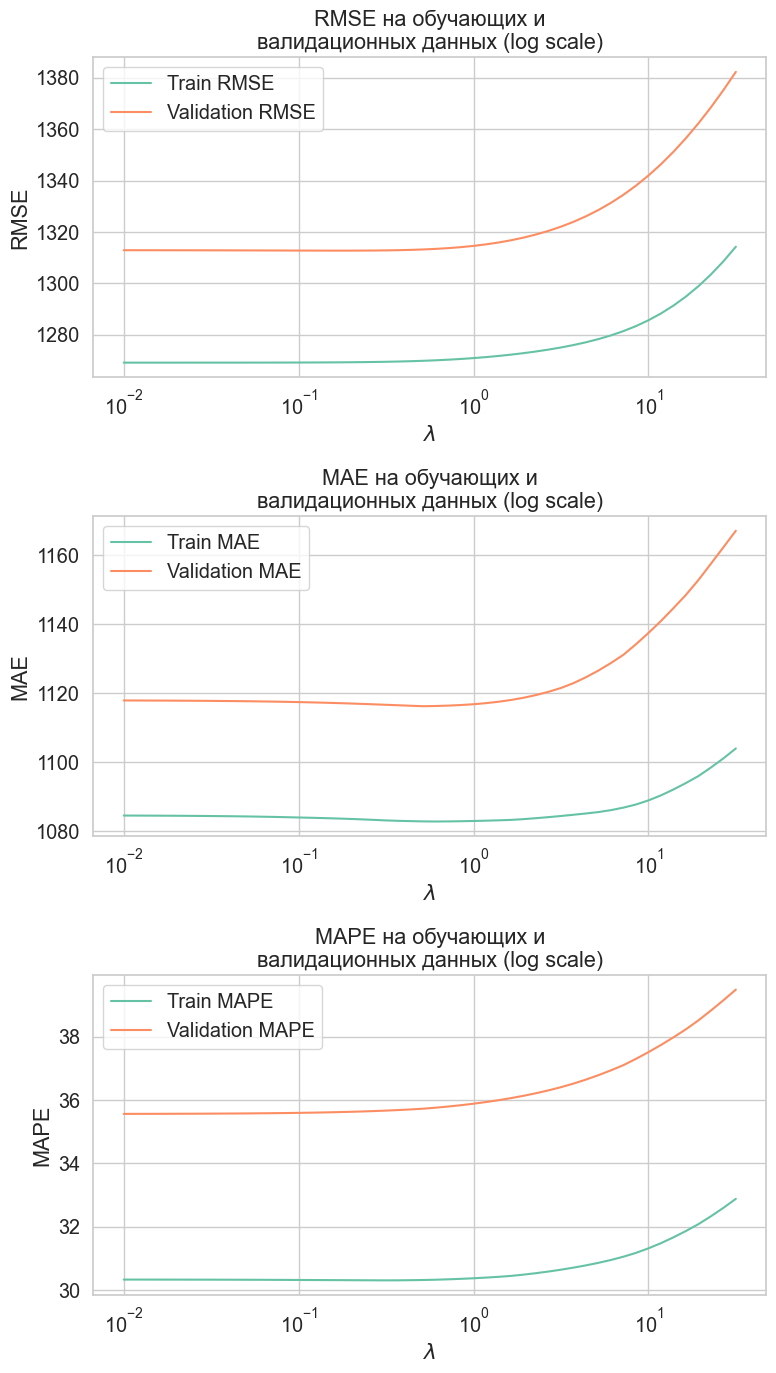

In [113]:
fig = plt.figure(figsize=(15, 14))

data = [(rmse_train, rmse_val), (mae_train, mae_val), (mape_train, mape_val)]
names = ['RMSE', 'MAE', 'MAPE']

for i in range(3):
    fig.add_subplot(3, 2, 2 * (i + 1))
    sns.lineplot(x=grid, y=data[i][0], label=f"Train {names[i]}")
    sns.lineplot(x=grid, y=data[i][1], label=f"Validation {names[i]}")
    plt.xscale('log')
    plt.title(f"{names[i]} на обучающих и\nвалидационных данных (log scale)")
    plt.xlabel('$\lambda$')
    plt.ylabel(names[i])
    plt.legend()

plt.tight_layout()
plt.show()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

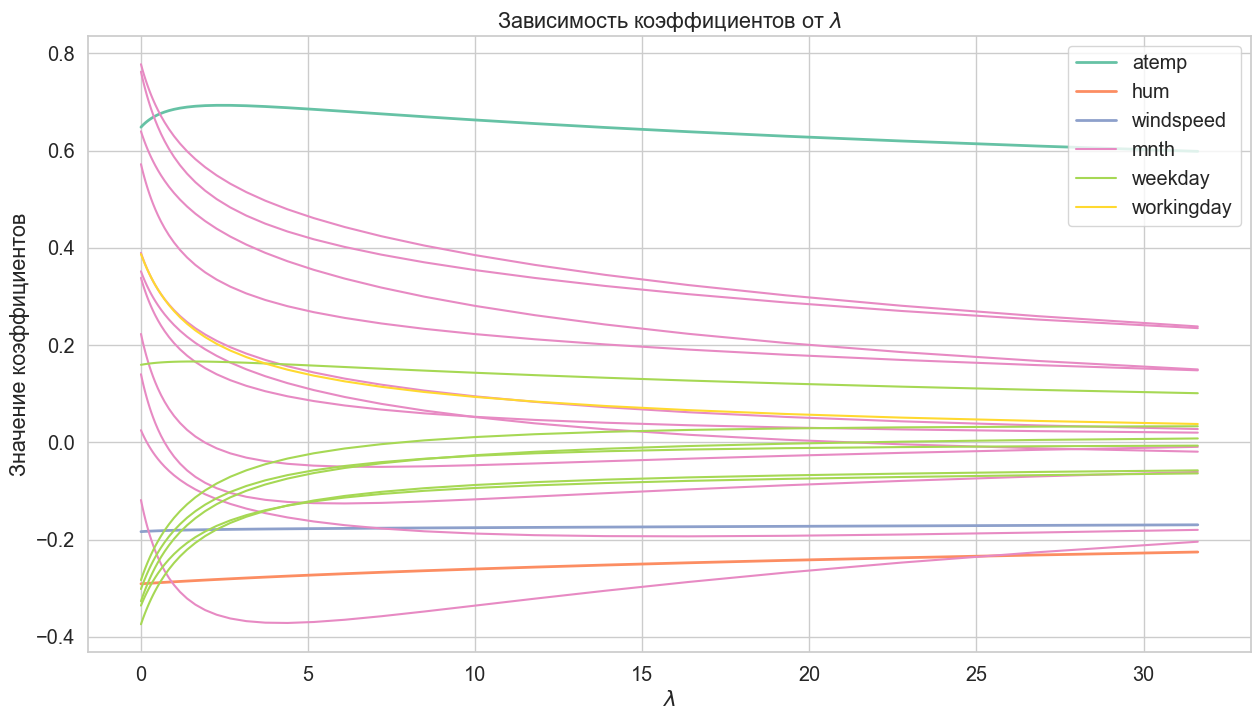

In [114]:
plt.figure(figsize=(15, 8))

# коэффициенты для вещественных признаков
for i, feature in enumerate(real_features):
    sns.lineplot(x=grid, y=coefs[i], label=feature, lw=2)

features_names = encoder.get_feature_names_out(categorial_features)

# коэффициенты для категориальных признаков
for i, feature in enumerate(categorial_features):
    first = True
    for j in range(len(real_features), len(coefs) - 1):
        if feature in features_names[j - len(real_features)]:
            if first:
                sns.lineplot(x=grid, y=coefs[j],
                     color=sns.color_palette()[i + len(real_features)],
                     label=feature)
            else:
                sns.lineplot(x=grid, y=coefs[j],
                     color=sns.color_palette()[i + len(real_features)])
      
            first = False
        
plt.title('Зависимость коэффициентов от $\lambda$')
plt.xlabel('$\lambda$')
plt.ylabel('Значение коэффициентов')
plt.legend()
plt.show()

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [123]:
model = RidgeRegression(lambd=17, fit_intercept=True)
tmp = model.fit(X, Y_scaled)

In [124]:
test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([X_scaler.transform(test[real_features]), test_cat])
Y_test = test[target_feature].to_numpy().reshape((test.shape[0], 1))

In [125]:
rmse, mae, mape = metrics(model, X_test, Y_test)

In [129]:
print('Значения метрик на тестовой выборке:')
print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('MAPE: {:.2f}%'.format(mape))

Значения метрик на тестовой выборке:
RMSE: 1360.24
MAE: 1157.70
MAPE: 129.33%


Сделайте выводы.

1. Ошибка у ridge-регрессии на исходных данных приблизительно такая же, как и у обычной.

2. Ошибка сильно зависит от случайного разделения выборки на три части. Исходя из этого можно предположить, что датасет слишком маленький.

3. Линейная регрессия не всегда дает хороший результат, даже если прослеживается линейная зависимость ответа от признаков.

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

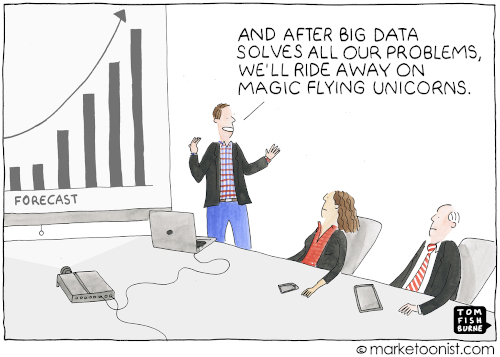

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [130]:
coef = np.zeros((X.shape[1] + 1, 1))

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.